In [1]:
#Importing all the needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [2]:
#Importing the Training set
train=pd.read_csv('train.csv')

<AxesSubplot:>

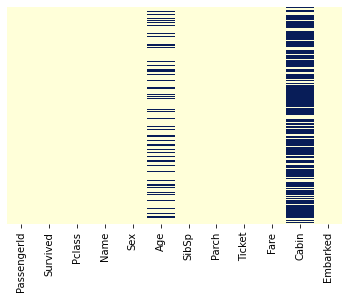

In [3]:
#Visualizing the null values using HeatMaps
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

<AxesSubplot:xlabel='Survived', ylabel='count'>

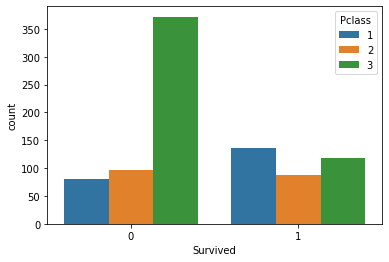

In [4]:
#Visualizing Survivors based on their Passenger Classes
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\Kedar Pandya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

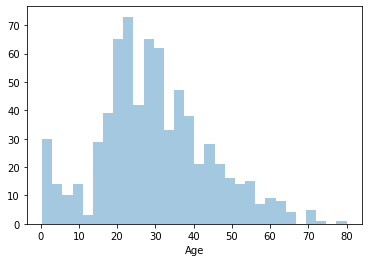

In [5]:
#Plotting on the bases of the Age of the Passengers
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

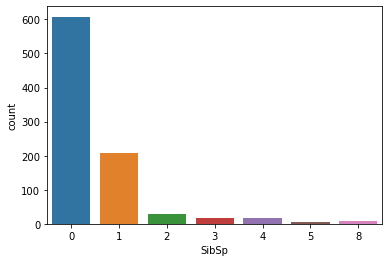

In [6]:
#Counting the number of Passengers who had boarded with their siblings and/or their spouses
sns.countplot(x='SibSp', data=train)

<AxesSubplot:ylabel='Frequency'>

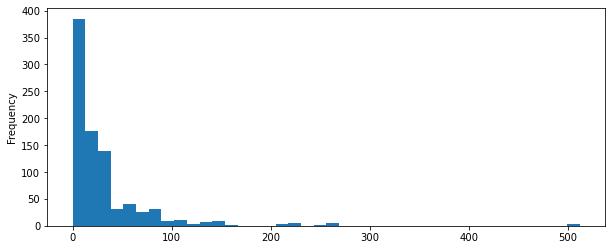

In [7]:
#Plotting Fare against the number of Passengers
train['Fare'].plot.hist(bins=40, figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

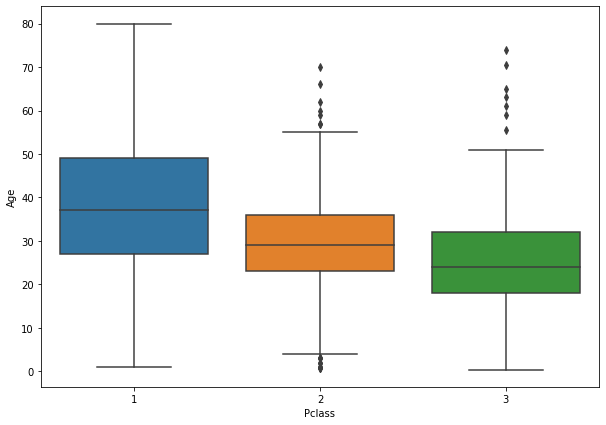

In [8]:
#Getting the Age of the Passengers on the basis of their Class, also the average Age per class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [9]:
#Defing a  function that will impute the Age columns on the basis of the Pclass
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
#Calling the above defined function to impute the Age column
train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

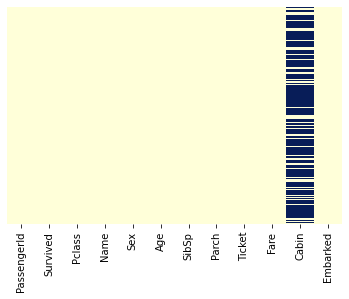

In [11]:
#Visualizing after the Imputation of the Age column
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [12]:
#Dropping the Cabin column since it doesn't have any direct effect on the prediction
train.drop('Cabin', axis=1, inplace=True)

In [13]:
#Checking the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

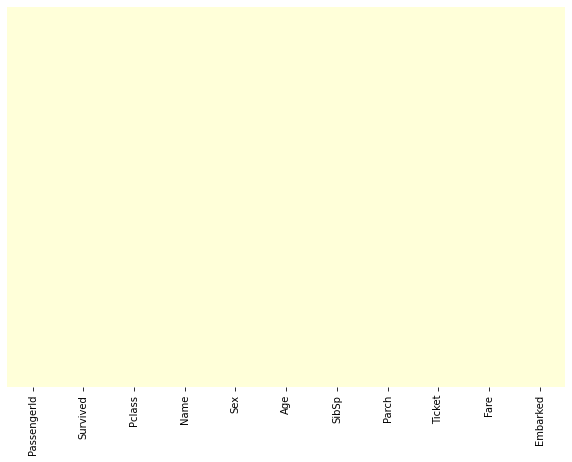

In [14]:
#Using HeatMap again to visualize the resultant set
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [15]:
#Dropping the remaining rows with null values in them
train.dropna(inplace=True)

In [16]:
#Dealing with categorical column Sex, Embarked, making dummmies
sex=pd.get_dummies(train['Sex'], drop_first=True)
embark=pd.get_dummies(train['Embarked'], drop_first=True)
classes=pd.get_dummies(train['Pclass'])

In [17]:
#Concatinating the newly created dummy columns with the existing dataframe
train=pd.concat([train,sex,embark], axis=1)
train=pd.concat([train,classes], axis=1)

In [18]:
#Dropping the those columns which will not be used during training
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Pclass', axis=1, inplace=True)

In [19]:
# We are done with cleaning of the training set. We now need to do the same to the Test set

In [20]:
#Importing the Test set
test=pd.read_csv('test.csv')

<AxesSubplot:>

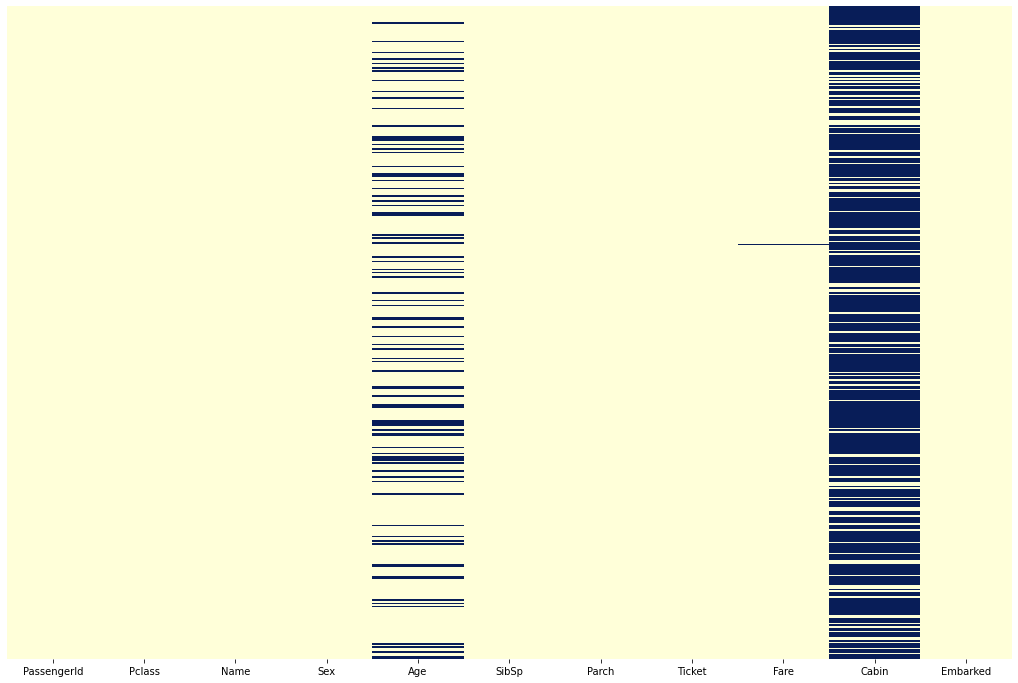

In [21]:
#Visulazing missing values using HeatMap
plt.figure(figsize=(18,12))
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

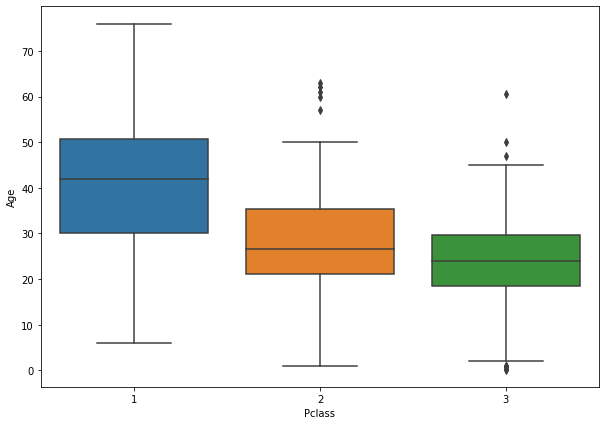

In [22]:
#Using BoxPlot to see which age group belongs to which Pclass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=test)

In [23]:
#Defining a function which will be used to impute Age columns of the Test set
def impute_age2(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [24]:
#Imputing the Age column by calling the above function        
test['Age']=test[['Age', 'Pclass']].apply(impute_age2, axis=1)

In [25]:
# As we saw in the heatmap that some of the values of 'Fare' column are missing
#Imputing Fare column for missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(test.iloc[:, 8:9])
test.iloc[:, 8:9] = imputer.transform(test.iloc[:, 8:9])

<AxesSubplot:>

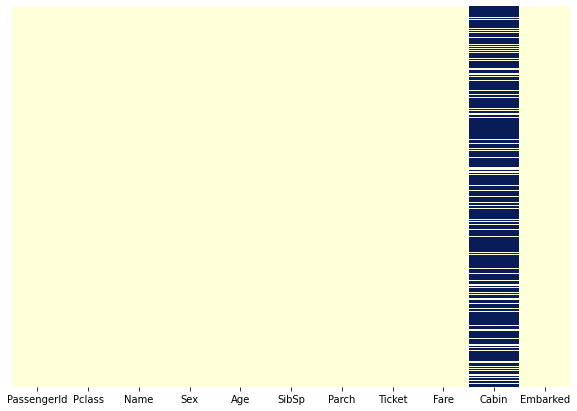

In [26]:
#Using HeatMap again to visualize the remaining missing values from the set
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [27]:
# The 'Cabin' column has too many values missing, so cannot perform imputation here.
#Dropping the Cabin column as done in the Training set
test.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

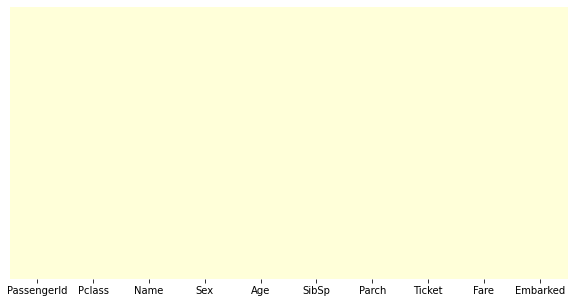

In [28]:
#Visualizing again to see the effect after Imputation
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [29]:
#Creating Dummy variables for categorical feaatures of the set and concatinating them to the Test set
sex2=pd.get_dummies(test['Sex'], drop_first=True)
embark2=pd.get_dummies(test['Embarked'], drop_first=True)
test=pd.concat([test,sex2,embark2], axis=1)
pclasses=pd.get_dummies(test['Pclass'])
test=pd.concat([test,pclasses], axis=1)

In [30]:
#Saving PassengerId before dropping it so that we can add it to the resultant csv file later
result=test.iloc[:,0]

In [31]:
#Dropping the redundant features which were converted to dummies earlier
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)
test.drop('Pclass', axis=1, inplace=True)

## Building a Logistic Regression Model

In [32]:
#Train Test Split
x_train=train.iloc[:,1:]
y_train=train.iloc[:,0:1]
x_test=test.iloc[:,:]

## Training and Predicting 

In [33]:
from sklearn.linear_model import LogisticRegression
logisticReg=LogisticRegression()
logisticReg.fit(x_train,y_train)

y_pred= logisticReg.predict(x_test)

C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

## Calculating accuracy of the model

In [34]:
accuracy = round(logisticReg.score(x_train, y_train) * 100, 2)

C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [35]:
print(accuracy)

81.1


## Writing the predictions to a csv file

In [36]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('logregresult.csv', index=False)

# Using Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
ranFor = RandomForestClassifier(n_estimators = 70)

# Training and Predicting

In [38]:
ranFor.fit(x_train,y_train)
y_pred2= ranFor.predict(x_test)

C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Kedar Pandya\AppData\Local\Temp\ipykernel_11508\3146493470.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranFor.fit(x_train,y_train)
C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Calculating accuracy of the model

In [39]:
accuracy2 =round(ranFor.score(x_train, y_train)*100,2)

C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
print(accuracy2)

98.2


# Writing the predictions to a csv file

In [41]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('rfcresult.csv', index=False)

# Using Support Vector Machine

In [42]:
from sklearn.svm import SVC
svc=SVC()

# Training and Predicting

In [43]:
svc.fit(x_train, y_train)

y_pred3=svc.predict(x_test)

C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


 ## Calculating accuracy of the model

In [44]:
accuracy3=round(svc.score(x_train, y_train)*100,2)

C:\Users\Kedar Pandya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [45]:
print(accuracy3)

68.05



## Writing the predictions to a csv file

In [46]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('svcresult.csv', index=False)

### Obviously we see that the Random Forest Classifier gave more accurate predictions.